# Pre-processing and Training Data Development - COVID19 Survival Prediction

In [14]:
# import necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

import os

In [15]:
# import the data set
# data is retrieved from https://www.kaggle.com/datasets/meirnizri/covid19-dataset/data
raw_df = pd.read_csv('C:/Users/Angela/casestudy/Capstone_Two/data/covid_data_cleaned.csv')
raw_df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DEATH,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,1,1,65,0,0,0,0,1,0,0,0,0,0,3
1,2,1,0,1,1,1,72,0,0,0,0,1,0,0,1,1,0,5
2,2,1,0,0,1,0,55,1,0,0,0,0,0,0,0,0,0,3
3,2,1,1,1,1,0,53,0,0,0,0,0,0,0,0,0,0,7
4,2,1,0,1,1,0,68,1,0,0,0,1,0,0,0,0,0,3


In [16]:
# use .unique() method to help determine which features should be coded

for col in raw_df.columns:
    print(col, raw_df[col].unique())

USMER [2 1]
MEDICAL_UNIT [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
SEX [1 0]
PATIENT_TYPE [1 0]
DEATH [1 0]
PNEUMONIA [1 0]
AGE [ 65  72  55  53  68  40  64  37  25  38  24  30  48  23  80  61  54  59
  45  26  32  49  39  27  57  20  56  47  50  46  43  28  33  16  62  58
  36  44  66  52  51  35  19  90  34  22  29  14  31  42  15   1   0  17
  41   2  10  12  13   4   7   6   8  60   5  63  75  81  67  18  70  88
  85  92  73  74  78  76  82  77  86  71  95  87  83  84  79  69  89   3
  97  93 100  91  21 103  11   9  94  96 101 107 102  98  99 109 119 116
 105 104 111 114 120 106 108 110 118 117 121 115 113]
DIABETES [0 1]
COPD [0 1]
ASTHMA [0 1]
INMSUPR [0 1]
HIPERTENSION [1 0]
OTHER_DISEASE [0 1]
CARDIOVASCULAR [0 1]
OBESITY [0 1]
RENAL_CHRONIC [0 1]
TOBACCO [0 1]
CLASIFFICATION_FINAL [3 5 7 6 1 2 4]


To prepare the training data, some binary features must be identified and transformed into dummy variables, including 'Sex', 'PATIENT_TYPE', and 'USMER'. 

In [17]:
# turn 'Sex' to a dummy variable
sex_df = pd.get_dummies(raw_df['SEX']).rename(columns=lambda x:'Male' if x == 0 else 'Female')
sex_df.head()

,Male,Female
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0


In [18]:
# turn 'PATIENT_TYPE', 'usmr' to a dummy variable
patient_df = pd.get_dummies(raw_df['PATIENT_TYPE']).rename(columns=lambda x:'Hospitalized' if x == 0 else 'Returned_home')
usmer_df = pd.get_dummies(raw_df['USMER']).rename(columns=lambda x:'Second_level' if x == 2 else 'First_level')

In [19]:
df = raw_df.drop(['SEX', 'PATIENT_TYPE', 'USMER'], axis=1)
df = pd.concat([df, sex_df, patient_df, usmer_df], axis=1)

df.head()

,MEDICAL_UNIT,DEATH,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,...,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Male,Female,Hospitalized,Returned_home,First_level,Second_level
0,1,1,1,65,0,0,0,0,1,0,...,0,0,0,3,0,1,0,1,0,1
1,1,1,1,72,0,0,0,0,1,0,...,1,1,0,5,1,0,0,1,0,1
2,1,1,0,55,1,0,0,0,0,0,...,0,0,0,3,1,0,1,0,0,1
3,1,1,0,53,0,0,0,0,0,0,...,0,0,0,7,0,1,0,1,0,1
4,1,1,0,68,1,0,0,0,1,0,...,0,0,0,3,1,0,0,1,0,1


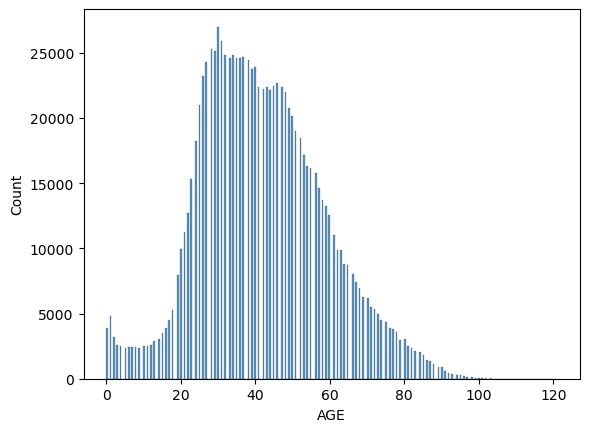

In [20]:
# check the distribution of column 'AGE'
sns.histplot(x=df.AGE)
plt.show()

In [21]:
# scale column 'Age', make the distribution closer to a standard normal distribution.

scaler = StandardScaler()
age_scaled = scaler.fit_transform(df[['AGE']])
df['age_scaled'] = age_scaled
df = df.drop(['AGE'], axis=1)

df.head()

,MEDICAL_UNIT,DEATH,PNEUMONIA,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,...,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Male,Female,Hospitalized,Returned_home,First_level,Second_level,age_scaled
0,1,1,1,0,0,0,0,1,0,0,...,0,0,3,0,1,0,1,0,1,1.372531
1,1,1,1,0,0,0,0,1,0,0,...,1,0,5,1,0,0,1,0,1,1.786551
2,1,1,0,1,0,0,0,0,0,0,...,0,0,3,1,0,1,0,0,1,0.781073
3,1,1,0,0,0,0,0,0,0,0,...,0,0,7,0,1,0,1,0,1,0.662781
4,1,1,0,1,0,0,0,1,0,0,...,0,0,3,1,0,0,1,0,1,1.549968


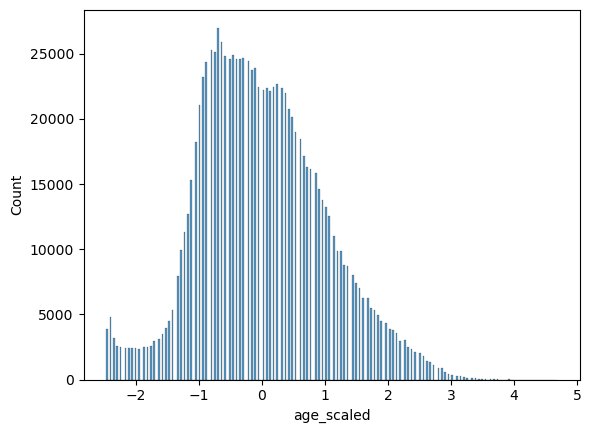

In [22]:
sns.histplot(x=df.age_scaled)
plt.show()

There are two categorical features needed to be coded: "MEDICAL_UNIT" and "CLASIFFICATION_FINAL".

In [23]:
encoder = OneHotEncoder(sparse=False)

categorical = encoder.fit_transform(raw_df[['MEDICAL_UNIT', 'CLASIFFICATION_FINAL']])
categorical_name = encoder.get_feature_names_out(['MEDICAL_UNIT', 'CLASIFFICATION_FINAL'])
categorical_df = pd.DataFrame(categorical, columns=categorical_name)

categorical_df.head()

,MEDICAL_UNIT_1,MEDICAL_UNIT_2,MEDICAL_UNIT_3,MEDICAL_UNIT_4,MEDICAL_UNIT_5,MEDICAL_UNIT_6,MEDICAL_UNIT_7,MEDICAL_UNIT_8,MEDICAL_UNIT_9,MEDICAL_UNIT_10,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13,CLASIFFICATION_FINAL_1,CLASIFFICATION_FINAL_2,CLASIFFICATION_FINAL_3,CLASIFFICATION_FINAL_4,CLASIFFICATION_FINAL_5,CLASIFFICATION_FINAL_6,CLASIFFICATION_FINAL_7
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [24]:
df = df.drop(['MEDICAL_UNIT', 'CLASIFFICATION_FINAL'], axis=1)
df = pd.concat([df, categorical_df], axis=1)

df.head()

,DEATH,PNEUMONIA,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,...,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13,CLASIFFICATION_FINAL_1,CLASIFFICATION_FINAL_2,CLASIFFICATION_FINAL_3,CLASIFFICATION_FINAL_4,CLASIFFICATION_FINAL_5,CLASIFFICATION_FINAL_6,CLASIFFICATION_FINAL_7
0,1,1,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1,0,0,0,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0,1,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [25]:
df.columns

Index(['DEATH', 'PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'Male', 'Female', 'Hospitalized',
       'Returned_home', 'First_level', 'Second_level', 'age_scaled',
       'MEDICAL_UNIT_1', 'MEDICAL_UNIT_2', 'MEDICAL_UNIT_3', 'MEDICAL_UNIT_4',
       'MEDICAL_UNIT_5', 'MEDICAL_UNIT_6', 'MEDICAL_UNIT_7', 'MEDICAL_UNIT_8',
       'MEDICAL_UNIT_9', 'MEDICAL_UNIT_10', 'MEDICAL_UNIT_11',
       'MEDICAL_UNIT_12', 'MEDICAL_UNIT_13', 'CLASIFFICATION_FINAL_1',
       'CLASIFFICATION_FINAL_2', 'CLASIFFICATION_FINAL_3',
       'CLASIFFICATION_FINAL_4', 'CLASIFFICATION_FINAL_5',
       'CLASIFFICATION_FINAL_6', 'CLASIFFICATION_FINAL_7'],
      dtype='object')

In [11]:
X = df.drop(columns='DEATH')
y = df['DEATH']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 2.54711386, -0.36787242, -0.12072115, ..., -0.15974126,
        -0.37310604, -0.9533324 ],
       [ 2.54711386, -0.36787242, -0.12072115, ...,  6.26012346,
        -0.37310604, -0.9533324 ],
       [-0.39260122,  2.71833373, -0.12072115, ..., -0.15974126,
        -0.37310604, -0.9533324 ],
       ...,
       [-0.39260122, -0.36787242, -0.12072115, ..., -0.15974126,
        -0.37310604,  1.04895207],
       [-0.39260122, -0.36787242, -0.12072115, ..., -0.15974126,
        -0.37310604,  1.04895207],
       [-0.39260122, -0.36787242, -0.12072115, ..., -0.15974126,
        -0.37310604,  1.04895207]])

In [26]:
# save the data to a new csv file
os.makedirs('/Users/Angela/casestudy/Capstone_Two/data', exist_ok=True)  
df.to_csv('/Users/Angela/casestudy/Capstone_Two/data/covid_data_train.csv', index=False)  